In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# Specify data paths
dataset = '/home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint.csv'
model_save_path = '/home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = '/home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
# Change training classes if necessary
NUM_CLASSES = 10

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([105,  93,  90, 272, 237, 357, 230, 556, 121, 295]))


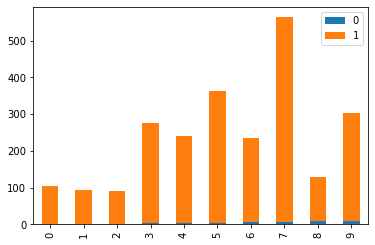

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3167 - accuracy: 0.0469
Epoch 00001: val_loss improved from inf to 2.13969, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 6ms/step - loss: 2.2106 - accuracy: 0.2020 - val_loss: 2.1397 - val_accuracy: 0.3073
Epoch 2/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.1781 - accuracy: 0.2656
Epoch 00002: val_loss improved from 2.13969 to 2.03714, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 2.0776 - accuracy: 0.2699 - val_loss: 2.0371 - val_accuracy: 0.2462
Epoch 3/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.0026 - accuracy: 0.2500
Epoch 

 1/28 [>.............................] - ETA: 0s - loss: 0.2823 - accuracy: 0.9219
Epoch 00019: val_loss improved from 0.30107 to 0.27555, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.9321 - val_loss: 0.2755 - val_accuracy: 0.9355
Epoch 20/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.3049 - accuracy: 0.8750
Epoch 00020: val_loss improved from 0.27555 to 0.23835, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.9502 - val_loss: 0.2384 - val_accuracy: 0.9593
Epoch 21/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.2506 - accuracy: 0.9688
Epoch 00021: 

Epoch 38/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0305 - accuracy: 1.0000
Epoch 00038: val_loss improved from 0.05055 to 0.04696, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9926 - val_loss: 0.0470 - val_accuracy: 0.9915
Epoch 39/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0689 - accuracy: 0.9844
Epoch 00039: val_loss improved from 0.04696 to 0.04538, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9926 - val_loss: 0.0454 - val_accuracy: 0.9915
Epoch 40/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000

Epoch 59/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0136 - accuracy: 1.0000
Epoch 00059: val_loss improved from 0.01890 to 0.01636, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0162 - accuracy: 0.9960 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 60/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 00060: val_loss did not improve from 0.01636
28/28 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9966 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 61/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 00061: val_loss did not improve from 0.01636
28/28 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.0165 - val_accuracy: 0

Epoch 84/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 00084: val_loss improved from 0.00754 to 0.00733, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9983
Epoch 85/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000
Epoch 00085: val_loss improved from 0.00733 to 0.00571, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 86/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000

Epoch 108/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 00108: val_loss did not improve from 0.00318
28/28 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 109/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 00109: val_loss improved from 0.00318 to 0.00278, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 110/1000
 1/28 [>.............................] - ETA: 0s - loss: 8.7314e-04 - accuracy: 1.0000
Epoch 00110: val_loss improved from 0.00278 to 0.00240, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gest

 1/28 [>.............................] - ETA: 0s - loss: 8.7172e-04 - accuracy: 1.0000
Epoch 00132: val_loss did not improve from 0.00157
28/28 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 133/1000
 1/28 [>.............................] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 00133: val_loss did not improve from 0.00157
28/28 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 134/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.3488e-04 - accuracy: 1.0000
Epoch 00134: val_loss did not improve from 0.00157
28/28 [==============================] - 0s 1ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 135/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.8051e-04 - accuracy: 1.0000
Epoch 00135: val_loss did not improve from 0.00157
28/28 [=============

 1/28 [>.............................] - ETA: 0s - loss: 3.0274e-04 - accuracy: 1.0000
Epoch 00158: val_loss did not improve from 0.00088
28/28 [==============================] - 0s 1ms/step - loss: 5.8845e-04 - accuracy: 1.0000 - val_loss: 9.6219e-04 - val_accuracy: 1.0000
Epoch 159/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.5325e-04 - accuracy: 1.0000
Epoch 00159: val_loss improved from 0.00088 to 0.00085, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 5.4855e-04 - accuracy: 1.0000 - val_loss: 8.4819e-04 - val_accuracy: 1.0000
Epoch 160/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.9535e-04 - accuracy: 1.0000
Epoch 00160: val_loss improved from 0.00085 to 0.00076, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/

Epoch 183/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.5713e-04 - accuracy: 1.0000
Epoch 00183: val_loss improved from 0.00056 to 0.00050, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 1ms/step - loss: 3.4739e-04 - accuracy: 1.0000 - val_loss: 4.9754e-04 - val_accuracy: 1.0000
Epoch 184/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.4214e-04 - accuracy: 1.0000
Epoch 00184: val_loss did not improve from 0.00050
28/28 [==============================] - 0s 1ms/step - loss: 3.4529e-04 - accuracy: 1.0000 - val_loss: 5.1711e-04 - val_accuracy: 1.0000
Epoch 185/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.7800e-04 - accuracy: 1.0000
Epoch 00185: val_loss did not improve from 0.00050
28/28 [==============================] - 0s 1ms/step - loss: 3.1234e-04 - accuracy: 1.0000 -

 1/28 [>.............................] - ETA: 0s - loss: 3.5557e-04 - accuracy: 1.0000
Epoch 00207: val_loss did not improve from 0.00027
28/28 [==============================] - 0s 1ms/step - loss: 1.9140e-04 - accuracy: 1.0000 - val_loss: 3.0664e-04 - val_accuracy: 1.0000
Epoch 208/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.1348e-04 - accuracy: 1.0000
Epoch 00208: val_loss did not improve from 0.00027
28/28 [==============================] - 0s 1ms/step - loss: 1.8646e-04 - accuracy: 1.0000 - val_loss: 4.2550e-04 - val_accuracy: 1.0000
Epoch 209/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.6830e-04 - accuracy: 1.0000
Epoch 00209: val_loss did not improve from 0.00027
28/28 [==============================] - 0s 1ms/step - loss: 1.9756e-04 - accuracy: 1.0000 - val_loss: 3.1620e-04 - val_accuracy: 1.0000
Epoch 210/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.2273e-04 - accuracy: 1.0000
Epoch 00210: val_loss did not improve from 

 1/28 [>.............................] - ETA: 0s - loss: 8.6623e-05 - accuracy: 1.0000
Epoch 00232: val_loss did not improve from 0.00019
28/28 [==============================] - 0s 1ms/step - loss: 1.2020e-04 - accuracy: 1.0000 - val_loss: 2.8506e-04 - val_accuracy: 1.0000
Epoch 233/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.0267e-04 - accuracy: 1.0000
Epoch 00233: val_loss did not improve from 0.00019
28/28 [==============================] - 0s 1ms/step - loss: 1.5199e-04 - accuracy: 1.0000 - val_loss: 2.3452e-04 - val_accuracy: 1.0000
Epoch 234/1000
 1/28 [>.............................] - ETA: 0s - loss: 7.0732e-05 - accuracy: 1.0000
Epoch 00234: val_loss did not improve from 0.00019
28/28 [==============================] - 0s 1ms/step - loss: 1.1432e-04 - accuracy: 1.0000 - val_loss: 1.9847e-04 - val_accuracy: 1.0000
Epoch 235/1000
 1/28 [>.............................] - ETA: 0s - loss: 9.4752e-05 - accuracy: 1.0000
Epoch 00235: val_loss did not improve from 

Epoch 257/1000
 1/28 [>.............................] - ETA: 0s - loss: 5.8795e-05 - accuracy: 1.0000
Epoch 00257: val_loss improved from 0.00013 to 0.00013, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-using-mediapipe/hand_gesture/src/model/keypoint_classifier/keypoint_classifier.hdf5
28/28 [==============================] - 0s 2ms/step - loss: 8.2684e-05 - accuracy: 1.0000 - val_loss: 1.2732e-04 - val_accuracy: 1.0000
Epoch 258/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.1551e-05 - accuracy: 1.0000
Epoch 00258: val_loss did not improve from 0.00013
28/28 [==============================] - 0s 1ms/step - loss: 7.5218e-05 - accuracy: 1.0000 - val_loss: 1.3890e-04 - val_accuracy: 1.0000
Epoch 259/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.6725e-05 - accuracy: 1.0000
Epoch 00259: val_loss improved from 0.00013 to 0.00012, saving model to /home/diabolokiat/project_hand/catkin_ws/src/hand-gesture-recognition-u

 1/28 [>.............................] - ETA: 0s - loss: 4.6055e-05 - accuracy: 1.0000
Epoch 00281: val_loss did not improve from 0.00009
28/28 [==============================] - 0s 1ms/step - loss: 5.9514e-05 - accuracy: 1.0000 - val_loss: 1.1500e-04 - val_accuracy: 1.0000
Epoch 282/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.1910e-04 - accuracy: 1.0000
Epoch 00282: val_loss did not improve from 0.00009
28/28 [==============================] - 0s 1ms/step - loss: 4.8884e-05 - accuracy: 1.0000 - val_loss: 9.2582e-05 - val_accuracy: 1.0000
Epoch 283/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3998e-05 - accuracy: 1.0000
Epoch 00283: val_loss did not improve from 0.00009
28/28 [==============================] - 0s 1ms/step - loss: 4.7064e-05 - accuracy: 1.0000 - val_loss: 8.9782e-05 - val_accuracy: 1.0000
Epoch 284/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.9500e-05 - accuracy: 1.0000
Epoch 00284: val_loss improved from 0.00009

28/28 [==============================] - 0s 2ms/step - loss: 3.8934e-05 - accuracy: 1.0000 - val_loss: 5.7250e-05 - val_accuracy: 1.0000
Epoch 304/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.3530e-05 - accuracy: 1.0000
Epoch 00304: val_loss did not improve from 0.00006
28/28 [==============================] - 0s 1ms/step - loss: 3.8172e-05 - accuracy: 1.0000 - val_loss: 7.6341e-05 - val_accuracy: 1.0000
Epoch 305/1000
 1/28 [>.............................] - ETA: 0s - loss: 4.0329e-05 - accuracy: 1.0000
Epoch 00305: val_loss did not improve from 0.00006
28/28 [==============================] - 0s 1ms/step - loss: 3.3925e-05 - accuracy: 1.0000 - val_loss: 5.8067e-05 - val_accuracy: 1.0000
Epoch 306/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3851e-05 - accuracy: 1.0000
Epoch 00306: val_loss did not improve from 0.00006
28/28 [==============================] - 0s 1ms/step - loss: 3.3550e-05 - accuracy: 1.0000 - val_loss: 6.4987e-05 - val_accuracy: 

Epoch 331/1000
 1/28 [>.............................] - ETA: 0s - loss: 7.0668e-06 - accuracy: 1.0000
Epoch 00331: val_loss did not improve from 0.00004
28/28 [==============================] - 0s 1ms/step - loss: 1.8704e-05 - accuracy: 1.0000 - val_loss: 4.8222e-05 - val_accuracy: 1.0000
Epoch 332/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.2135e-05 - accuracy: 1.0000
Epoch 00332: val_loss did not improve from 0.00004
28/28 [==============================] - 0s 1ms/step - loss: 1.9656e-05 - accuracy: 1.0000 - val_loss: 4.7291e-05 - val_accuracy: 1.0000
Epoch 333/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.4338e-05 - accuracy: 1.0000
Epoch 00333: val_loss did not improve from 0.00004
28/28 [==============================] - 0s 1ms/step - loss: 2.2348e-05 - accuracy: 1.0000 - val_loss: 4.2324e-05 - val_accuracy: 1.0000
Epoch 334/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.5245e-05 - accuracy: 1.0000
Epoch 00334: val_loss did no

Epoch 358/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.3195e-05 - accuracy: 1.0000
Epoch 00358: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 6.2406e-05 - accuracy: 1.0000 - val_loss: 1.6508e-04 - val_accuracy: 1.0000
Epoch 359/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.7589e-05 - accuracy: 1.0000
Epoch 00359: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 5.9401e-05 - accuracy: 1.0000 - val_loss: 1.6079e-04 - val_accuracy: 1.0000
Epoch 360/1000
 1/28 [>.............................] - ETA: 0s - loss: 8.5255e-05 - accuracy: 1.0000
Epoch 00360: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 5.6576e-05 - accuracy: 1.0000 - val_loss: 1.5973e-04 - val_accuracy: 1.0000
Epoch 361/1000
 1/28 [>.............................] - ETA: 0s - loss: 1.8051e-05 - accuracy: 1.0000
Epoch 00361: val_loss did no

 1/28 [>.............................] - ETA: 0s - loss: 1.0771e-05 - accuracy: 1.0000
Epoch 00386: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 3.1013e-05 - accuracy: 1.0000 - val_loss: 1.0021e-04 - val_accuracy: 1.0000
Epoch 387/1000
 1/28 [>.............................] - ETA: 0s - loss: 2.0247e-05 - accuracy: 1.0000
Epoch 00387: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 3.0356e-05 - accuracy: 1.0000 - val_loss: 9.7473e-05 - val_accuracy: 1.0000
Epoch 388/1000
 1/28 [>.............................] - ETA: 0s - loss: 3.3216e-05 - accuracy: 1.0000
Epoch 00388: val_loss did not improve from 0.00003
28/28 [==============================] - 0s 1ms/step - loss: 3.0088e-05 - accuracy: 1.0000 - val_loss: 9.3242e-05 - val_accuracy: 1.0000
Epoch 389/1000
 1/28 [>.............................] - ETA: 0s - loss: 6.6362e-05 - accuracy: 1.0000
Epoch 00389: val_loss did not improve from 

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

10/10 [==============================] - 0s 461us/step - loss: 3.4363e-05 - accuracy: 1.0000


In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.1636128e-17 0.0000000e+00 3.0764327e-16 2.0245841e-29 9.9999952e-01
 2.8034174e-08 1.1201509e-16 2.3885974e-07 1.8412912e-12 1.8823329e-07]
4


# Confusion matrix

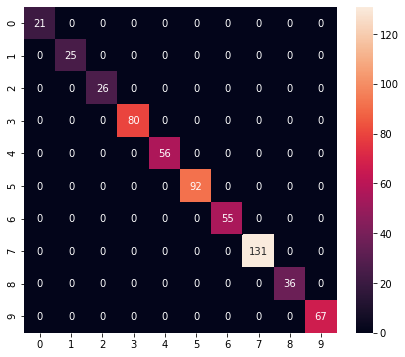

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        80
           4       1.00      1.00      1.00        56
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00        36
           9       1.00      1.00      1.00        67

    accuracy                           1.00       589
   macro avg       1.00      1.00      1.00       589
weighted avg       1.00      1.00      1.00       589



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

7568

## Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 364 µs, sys: 89 µs, total: 453 µs
Wall time: 299 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6483811e-18 0.0000000e+00 2.8062143e-16 1.0354615e-29 9.9999940e-01
 1.7015815e-08 5.0251656e-17 2.9654171e-07 1.5797141e-12 2.3530909e-07]
4
